# Análise de conjunto de dados, disponibilizados na plataforma Kaggle
Fontes Principais:
1. Forças Armadas da Ucrânia
https://www.zsu.gov.ua/en

2. Ministério da defesa da Ucrânia
https://www.mil.gov.ua/en/

Inicialmente o intuito é saber sobre o número de fatalidades(mortes de militares em operação) russas para que se possa calcular tendências futuras no decorrer do conflito

Conjunto de dados disponivél em -> https://www.kaggle.com/datasets/piterfm/2022-ukraine-russian-war

In [1]:
#   Importando bibliotecas pertinentes
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.graph_objects as go
import numpy as np
import kaggle
from zipfile import ZipFile


In [2]:
#   Puxando DataSet da API do Kaggle
!kaggle datasets download -d piterfm/2022-ukraine-russian-war --force


  0%|          | 0.00/2.50k [00:00<?, ?B/s]
100%|██████████| 2.50k/2.50k [00:00<00:00, 307kB/s]


In [3]:
#   Criando o DataFrame
zip_file = ZipFile('2022-ukraine-russian-war.zip')
df = pd.read_csv(zip_file.open('russia_losses_personnel.csv'), usecols=[0, 1, 2, 4])

In [4]:
df.head(3)

,date,day,personnel,POW
0,2022-02-25,2,2800,0
1,2022-02-26,3,4300,0
2,2022-02-27,4,4500,0


In [5]:
#   Traduzindo headers e dando uma olhada no DataFrame

df.columns=['data', 'dia_conflito', 'total_fatalidades', 'prisioneiros']
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68 entries, 0 to 67
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   data               68 non-null     object
 1   dia_conflito       68 non-null     int64 
 2   total_fatalidades  68 non-null     int64 
 3   prisioneiros       68 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 2.2+ KB


Verifica-se nos dois blocos acima que a data além de estar como 'object', está no padrão internacional e tabém não encontramos entradas nulas no DataFrame

In [6]:
#   Modelando a data
#   Mudando o tipo primitivo
df['data'] = pd.to_datetime(df.data)

#   Mudando o formato de data de mes/dia para dia/mes
df['data'] = df['data'].dt.strftime('%d/%m/%Y')
df.head(3)


,data,dia_conflito,total_fatalidades,prisioneiros
0,25/02/2022,2,2800,0
1,26/02/2022,3,4300,0
2,27/02/2022,4,4500,0


In [7]:
#   O DataFrame tem apenas o valor acumulado, então vamos calcular o valor dia-a-dia
#   Inserindo coluna fatalidades no dia
df = df.assign(fatalidades_no_dia=0)
#   Passando um loop (por ser um número pequenos de entradas) 
c = 0
for fat in df['total_fatalidades']:
    if c == 0:
        value = df['total_fatalidades'][c]
        df['fatalidades_no_dia'][c] = value
        c += 1
    else:
        value = df['total_fatalidades'][c] - df['total_fatalidades'][c-1]
        df['fatalidades_no_dia'][c] = value
        c +=1
df.head(5)  



C:\Users\manda\AppData\Local\Temp\ipykernel_12016\3921586042.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['fatalidades_no_dia'][c] = value
C:\Users\manda\AppData\Local\Temp\ipykernel_12016\3921586042.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['fatalidades_no_dia'][c] = value


,data,dia_conflito,total_fatalidades,prisioneiros,fatalidades_no_dia
0,25/02/2022,2,2800,0,2800
1,26/02/2022,3,4300,0,1500
2,27/02/2022,4,4500,0,200
3,28/02/2022,5,5300,0,800
4,01/03/2022,6,5710,200,410


In [8]:
#   Dando uma olhada no DataFrame inteiro
pd.set_option('display.max_rows', 100)
display(df)

,data,dia_conflito,total_fatalidades,prisioneiros,fatalidades_no_dia
0,25/02/2022,2,2800,0,2800
1,26/02/2022,3,4300,0,1500
2,27/02/2022,4,4500,0,200
3,28/02/2022,5,5300,0,800
4,01/03/2022,6,5710,200,410
5,02/03/2022,7,5840,200,130
6,03/03/2022,8,9000,200,3160
7,04/03/2022,9,9166,200,166
8,05/03/2022,10,10000,216,834
9,06/03/2022,11,11000,232,1000


<AxesSubplot:>

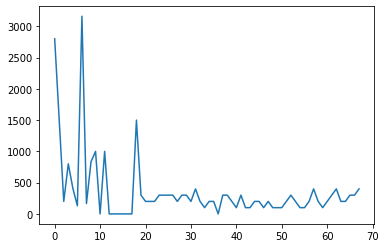

In [9]:
df['fatalidades_no_dia'].plot.line()